In [1]:
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
!pip install sklearn-crfsuite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.4 MB/s eta 0:00:00


In [4]:
import nltk
from sklearn_crfsuite import CRF
from nltk import word_tokenize, pos_tag
from sklearn.model_selection import train_test_split
from sklearn_crfsuite.metrics import flat_classification_report

# Feature extraction for a word in a sentence
def extract_features(sentence, i):
    word = sentence[i][0]
    postag = sentence[i][1]

    # Features for current word
    features = {
        'word': word,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[:3]': word[:3],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
    }

    # Previous word features
    if i > 0:
        word1 = sentence[i-1][0]
        postag1 = sentence[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:postag': postag1,
        })
    else:
        features['BOS'] = True  # Beginning of Sentence

    # Next word features
    if i < len(sentence) - 1:
        word1 = sentence[i+1][0]
        postag1 = sentence[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:postag': postag1,
        })
    else:
        features['EOS'] = True  # End of Sentence

    return features

# Transform sentence into features
def sentence2features(sentence):
    return [extract_features(sentence, i) for i in range(len(sentence))]

# Extract labels from sentence (the third element)
def sentence2labels(sentence):
    return [label for token, postag, label in sentence]

# Sample dataset processing (you can replace this with your own data)
data = [
    [("Aam", "NNP", "B-ORG"), ("Aadmi", "NNP", "I-ORG"), ("Party", "NNP", "I-ORG")],
    [("Atishi", "NNP", "B-PER"), ("was", "VBD", "O"), ("picked", "VBD", "O")],
    [("Chief", "NNP", "B-TITLE"), ("Minister", "NNP", "I-TITLE"), ("Kejriwal", "NNP", "B-PER")],
    [("Delhi", "NNP", "B-LOC"), ("minister", "NN", "O")],
    [("Jayalalithaa", "NNP", "B-PER"), ("became", "VBD", "O"), ("the", "DT", "O"), ("CM", "NNP", "B-TITLE")],
]

# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2)

# Continue with the rest of the code...


# Model creation
crf = CRF(algorithm='lbfgs', max_iterations=100)

# Train the model
X_train = [sentence2features(s) for s in train_data]
y_train = [sentence2labels(s) for s in train_data]
crf.fit(X_train, y_train)

# Test the model
X_test = [sentence2features(s) for s in test_data]
y_test = [sentence2labels(s) for s in test_data]
y_pred = crf.predict(X_test)

# Evaluation
print(flat_classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       B-PER       1.00      1.00      1.00         1
     B-TITLE       0.00      0.00      0.00         1
           O       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
import spacy
from spacy import displacy

# Load pre-trained NER model in spaCy
nlp = spacy.load("en_core_web_sm")

# Example text (you can replace this with your own dataset text)
text = """Aam Aadmi Party (AAP) MLA and Delhi minister Atishi was picked by the party as Chief Minister Arvind Kejriwal’s successor. She is the youngest woman to hold the post. Other female CMs include Sucheta Kripalani, Mayawati, and J Jayalalithaa."""

# Process the text using spaCy NER
doc = nlp(text)

# Render the entities in the text using displacy
displacy.render(doc, style="ent", jupyter=True)


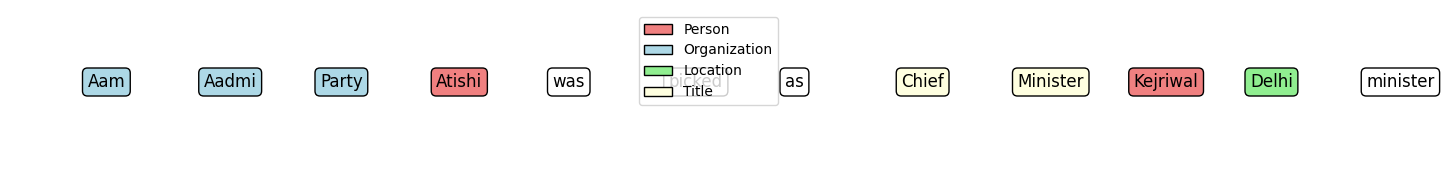

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Example data with tokens, POS tags, and predicted NER labels
data = [
    ("Aam", "NNP", "B-ORG"),
    ("Aadmi", "NNP", "I-ORG"),
    ("Party", "NNP", "I-ORG"),
    ("Atishi", "NNP", "B-PER"),
    ("was", "VBD", "O"),
    ("picked", "VBD", "O"),
    ("as", "IN", "O"),
    ("Chief", "NNP", "B-TITLE"),
    ("Minister", "NNP", "I-TITLE"),
    ("Kejriwal", "NNP", "B-PER"),
    ("Delhi", "NNP", "B-LOC"),
    ("minister", "NN", "O")
]

# Assign colors for each type of named entity
entity_colors = {
    "B-PER": "lightcoral",
    "I-PER": "lightcoral",
    "B-ORG": "lightblue",
    "I-ORG": "lightblue",
    "B-LOC": "lightgreen",
    "I-LOC": "lightgreen",
    "B-TITLE": "lightyellow",
    "I-TITLE": "lightyellow",
    "O": "white"  # No entity
}

# Plot the tokens and color the named entities
def visualize_ner(data):
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.set_axis_off()

    # Define patches for the legend
    legend_elements = [
        Patch(facecolor="lightcoral", edgecolor="black", label="Person"),
        Patch(facecolor="lightblue", edgecolor="black", label="Organization"),
        Patch(facecolor="lightgreen", edgecolor="black", label="Location"),
        Patch(facecolor="lightyellow", edgecolor="black", label="Title")
    ]

    # Print tokens with colored backgrounds for NER
    for i, (token, pos, label) in enumerate(data):
        color = entity_colors.get(label, "white")
        ax.text(0.1 + i*0.15, 0.5, token, bbox=dict(facecolor=color, edgecolor="black", boxstyle="round,pad=0.3"), fontsize=12)

    # Add legend
    ax.legend(handles=legend_elements, loc="upper right")

    plt.show()

# Call the visualization function
visualize_ner(data)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

       B-LOC       0.00      0.00      0.00         0
       B-ORG       0.00      0.00      0.00         1
       B-PER       0.00      0.00      0.00         2
     B-TITLE       0.50      1.00      0.67         1
       I-ORG       0.00      0.00      0.00         2
       I-PER       0.00      0.00      0.00         1
     I-TITLE       0.50      1.00      0.67         1
           O       0.67      1.00      0.80         6

    accuracy                           0.57        14
   macro avg       0.21      0.38      0.27        14
weighted avg       0.36      0.57      0.44        14



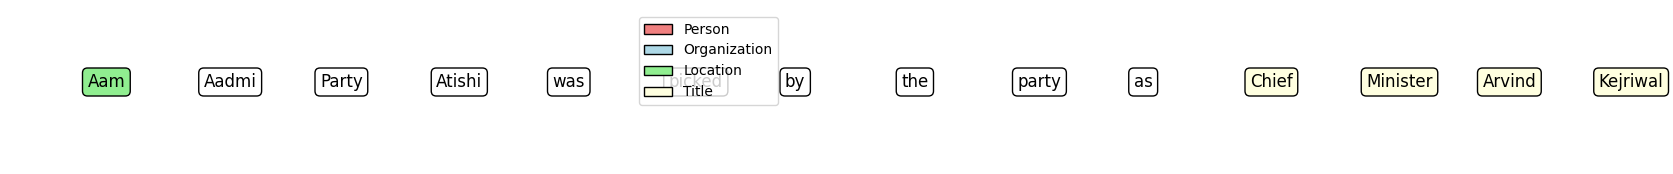

In [7]:
import nltk
from sklearn_crfsuite import CRF
from sklearn.model_selection import train_test_split
from sklearn_crfsuite.metrics import flat_classification_report
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Feature extraction for a word in a sentence
def extract_features(sentence, i):
    word = sentence[i][0]
    postag = sentence[i][1]

    # Features for current word
    features = {
        'word': word,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[:3]': word[:3],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
    }

    # Previous word features
    if i > 0:
        word1 = sentence[i-1][0]
        postag1 = sentence[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:postag': postag1,
        })
    else:
        features['BOS'] = True  # Beginning of Sentence

    # Next word features
    if i < len(sentence) - 1:
        word1 = sentence[i+1][0]
        postag1 = sentence[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:postag': postag1,
        })
    else:
        features['EOS'] = True  # End of Sentence

    return features

# Convert sentence to features
def sentence2features(sentence):
    return [extract_features(sentence, i) for i in range(len(sentence))]

# Extract labels from sentence
def sentence2labels(sentence):
    return [label for token, postag, label in sentence]

# Sample dataset (Tokens, POS tags, and Labels)
data = [
    [("Aam", "NNP", "B-ORG"), ("Aadmi", "NNP", "I-ORG"), ("Party", "NNP", "I-ORG"), ("Atishi", "NNP", "B-PER"),
     ("was", "VBD", "O"), ("picked", "VBD", "O"), ("by", "IN", "O"), ("the", "DT", "O"), ("party", "NN", "O"),
     ("as", "IN", "O"), ("Chief", "NNP", "B-TITLE"), ("Minister", "NNP", "I-TITLE"), ("Arvind", "NNP", "B-PER"),
     ("Kejriwal", "NNP", "I-PER")],
    [("Delhi", "NNP", "B-LOC"), ("minister", "NN", "O"), ("Sucheta", "NNP", "B-PER"), ("Kripalani", "NNP", "I-PER"),
     ("became", "VBD", "O"), ("the", "DT", "O"), ("first", "JJ", "O"), ("female", "JJ", "O"), ("Chief", "NNP", "B-TITLE"),
     ("Minister", "NNP", "I-TITLE")],
]

# Train-test split
train_data, test_data = train_test_split(data, test_size=0.5)

# Train the CRF model
crf = CRF(algorithm='lbfgs', max_iterations=100)
X_train = [sentence2features(s) for s in train_data]
y_train = [sentence2labels(s) for s in train_data]
crf.fit(X_train, y_train)

# Test the model on the test data
X_test = [sentence2features(s) for s in test_data]
y_test = [sentence2labels(s) for s in test_data]
y_pred = crf.predict(X_test)

# Print the classification report
print(flat_classification_report(y_test, y_pred))

# Visualize the NER result using matplotlib
def visualize_ner(tokens, labels):
    entity_colors = {
        "B-PER": "lightcoral",
        "I-PER": "lightcoral",
        "B-ORG": "lightblue",
        "I-ORG": "lightblue",
        "B-LOC": "lightgreen",
        "I-LOC": "lightgreen",
        "B-TITLE": "lightyellow",
        "I-TITLE": "lightyellow",
        "O": "white"  # No entity
    }

    fig, ax = plt.subplots(figsize=(10, 2))
    ax.set_axis_off()

    # Define patches for the legend
    legend_elements = [
        Patch(facecolor="lightcoral", edgecolor="black", label="Person"),
        Patch(facecolor="lightblue", edgecolor="black", label="Organization"),
        Patch(facecolor="lightgreen", edgecolor="black", label="Location"),
        Patch(facecolor="lightyellow", edgecolor="black", label="Title")
    ]

    # Display tokens with colored backgrounds for NER labels
    for i, (token, label) in enumerate(zip(tokens, labels)):
        color = entity_colors.get(label, "white")
        ax.text(0.1 + i*0.15, 0.5, token, bbox=dict(facecolor=color, edgecolor="black", boxstyle="round,pad=0.3"), fontsize=12)

    # Add legend
    ax.legend(handles=legend_elements, loc="upper right")
    plt.show()

# Test visualization on a sentence from the test data
for i, sentence in enumerate(test_data):
    tokens = [token for token, pos, label in sentence]
    labels = y_pred[i]
    visualize_ner(tokens, labels)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-LOC       0.00      0.00      0.00         2
       B-ORG       0.00      0.00      0.00         1
       B-PER       1.00      0.25      0.40         4
     B-TITLE       0.00      0.00      0.00         4
       I-ORG       0.00      0.00      0.00         2
       I-PER       0.00      0.00      0.00         2
     I-TITLE       0.00      0.00      0.00         3
           O       0.55      1.00      0.71        21

    accuracy                           0.56        39
   macro avg       0.19      0.16      0.14        39
weighted avg       0.40      0.56      0.42        39



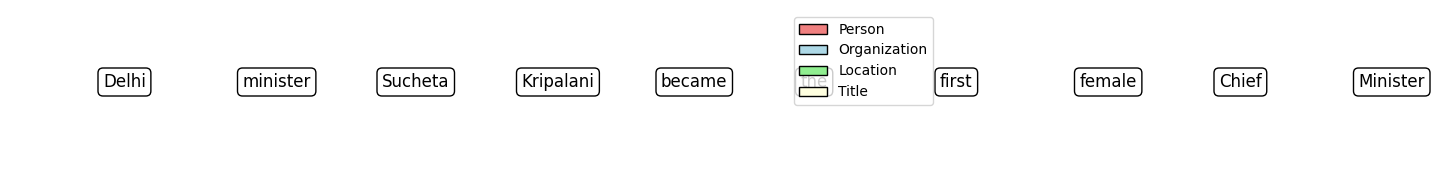

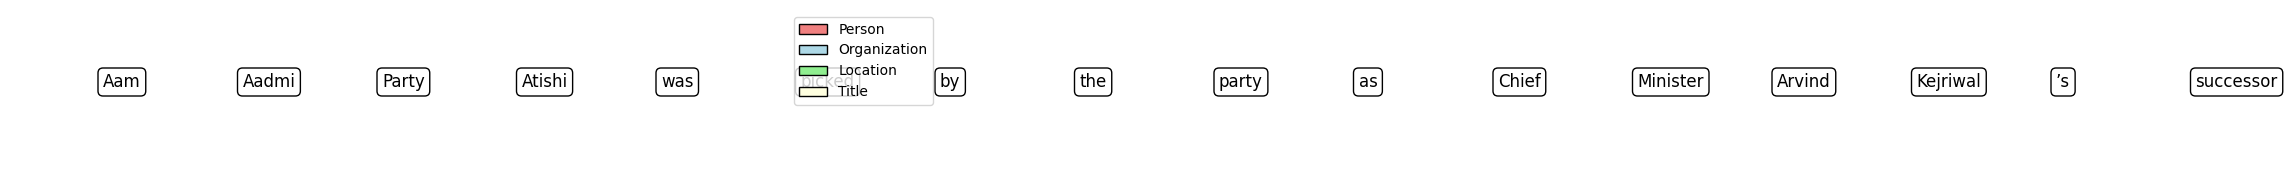

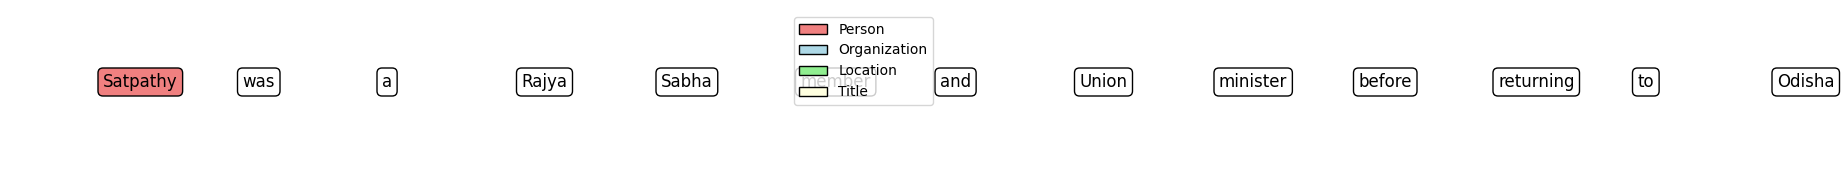

In [8]:
import nltk
from sklearn_crfsuite import CRF
from sklearn.model_selection import train_test_split
from sklearn_crfsuite.metrics import flat_classification_report
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Feature extraction for a word in a sentence
def extract_features(sentence, i):
    word = sentence[i][0]
    postag = sentence[i][1]

    # Features for current word
    features = {
        'word': word,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[:3]': word[:3],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
    }

    # Previous word features
    if i > 0:
        word1 = sentence[i-1][0]
        postag1 = sentence[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:postag': postag1,
        })
    else:
        features['BOS'] = True  # Beginning of Sentence

    # Next word features
    if i < len(sentence) - 1:
        word1 = sentence[i+1][0]
        postag1 = sentence[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:postag': postag1,
        })
    else:
        features['EOS'] = True  # End of Sentence

    return features

# Convert sentence to features
def sentence2features(sentence):
    return [extract_features(sentence, i) for i in range(len(sentence))]

# Extract labels from sentence
def sentence2labels(sentence):
    return [label for token, postag, label in sentence]

# Complete dataset with tokens, POS tags, and labels
data = [
    [("Aam", "NNP", "B-ORG"), ("Aadmi", "NNP", "I-ORG"), ("Party", "NNP", "I-ORG"), ("Atishi", "NNP", "B-PER"),
     ("was", "VBD", "O"), ("picked", "VBD", "O"), ("by", "IN", "O"), ("the", "DT", "O"), ("party", "NN", "O"),
     ("as", "IN", "O"), ("Chief", "NNP", "B-TITLE"), ("Minister", "NNP", "I-TITLE"), ("Arvind", "NNP", "B-PER"),
     ("Kejriwal", "NNP", "I-PER"), ("’s", "POS", "O"), ("successor", "NN", "O")],

    [("Delhi", "NNP", "B-LOC"), ("minister", "NN", "O"), ("Sucheta", "NNP", "B-PER"), ("Kripalani", "NNP", "I-PER"),
     ("became", "VBD", "O"), ("the", "DT", "O"), ("first", "JJ", "O"), ("female", "JJ", "O"), ("Chief", "NNP", "B-TITLE"),
     ("Minister", "NNP", "I-TITLE")],

    [("India", "NNP", "B-LOC"), ("’s", "POS", "O"), ("first", "JJ", "O"), ("woman", "NN", "O"), ("CM", "NNP", "B-TITLE"),
     ("and", "CC", "O"), ("the", "DT", "O"), ("state", "NN", "O"), ("’s", "POS", "O"), ("fourth", "JJ", "O"),
     ("Kripalani", "NNP", "B-PER"), ("was", "VBD", "O"), ("55", "CD", "O"), ("years", "NNS", "O"), ("old", "JJ", "O")],

    [("Satpathy", "NNP", "B-PER"), ("was", "VBD", "O"), ("a", "DT", "O"), ("Rajya", "NNP", "B-TITLE"),
     ("Sabha", "NNP", "I-TITLE"), ("member", "NN", "O"), ("and", "CC", "O"), ("Union", "NNP", "B-TITLE"),
     ("minister", "NN", "O"), ("before", "IN", "O"), ("returning", "VBG", "O"), ("to", "TO", "O"), ("Odisha", "NNP", "B-LOC")],

    [("Jayalalithaa", "NNP", "B-PER"), ("served", "VBD", "O"), ("as", "IN", "O"), ("the", "DT", "O"),
     ("first", "JJ", "O"), ("woman", "NN", "O"), ("CM", "NNP", "B-TITLE"), ("of", "IN", "O"), ("Tamil", "NNP", "B-LOC"),
     ("Nadu", "NNP", "I-LOC")]
]

# Train-test split
train_data, test_data = train_test_split(data, test_size=0.5)

# Train the CRF model
crf = CRF(algorithm='lbfgs', max_iterations=100)
X_train = [sentence2features(s) for s in train_data]
y_train = [sentence2labels(s) for s in train_data]
crf.fit(X_train, y_train)

# Test the model on the test data
X_test = [sentence2features(s) for s in test_data]
y_test = [sentence2labels(s) for s in test_data]
y_pred = crf.predict(X_test)

# Print the classification report
print(flat_classification_report(y_test, y_pred))

# Visualize the NER result using matplotlib
def visualize_ner(tokens, labels):
    entity_colors = {
        "B-PER": "lightcoral",
        "I-PER": "lightcoral",
        "B-ORG": "lightblue",
        "I-ORG": "lightblue",
        "B-LOC": "lightgreen",
        "I-LOC": "lightgreen",
        "B-TITLE": "lightyellow",
        "I-TITLE": "lightyellow",
        "O": "white"  # No entity
    }

    fig, ax = plt.subplots(figsize=(12, 2))
    ax.set_axis_off()

    # Define patches for the legend
    legend_elements = [
        Patch(facecolor="lightcoral", edgecolor="black", label="Person"),
        Patch(facecolor="lightblue", edgecolor="black", label="Organization"),
        Patch(facecolor="lightgreen", edgecolor="black", label="Location"),
        Patch(facecolor="lightyellow", edgecolor="black", label="Title")
    ]

    # Display tokens with colored backgrounds for NER labels
    for i, (token, label) in enumerate(zip(tokens, labels)):
        color = entity_colors.get(label, "white")
        ax.text(0.1 + i*0.15, 0.5, token, bbox=dict(facecolor=color, edgecolor="black", boxstyle="round,pad=0.3"), fontsize=12)

    # Add legend
    ax.legend(handles=legend_elements, loc="upper right")
    plt.show()

# Test visualization on a sentence from the test data
for i, sentence in enumerate(test_data):
    tokens = [token for token, pos, label in sentence]
    labels = y_pred[i]
    visualize_ner(tokens, labels)


In [9]:
import json
import spacy
from spacy.tokens import DocBin

# Load data from annotations.json
def load_annotations(json_file):
    with open(json_file, 'r', encoding='utf8') as f:
        data = json.load(f)
    return data

# Convert the data to spaCy's format
def convert_annotations_to_spacy(json_file, output_file):
    nlp = spacy.blank("en")  # Load a blank English model
    doc_bin = DocBin()

    annotations = load_annotations(json_file)

    for text, annotations in annotations['annotations']:
        doc = nlp.make_doc(text)
        ents = []
        for start, end, label in annotations['entities']:
            span = doc.char_span(start, end, label=label)
            if span is None:
                print(f"Skipping entity in {text} due to misalignment.")
            else:
                ents.append(span)
        doc.ents = ents  # Assign the entities to the document
        doc_bin.add(doc)

    doc_bin.to_disk(output_file)
    print(f"Data saved in spaCy format at {output_file}")

# Convert the provided annotation file to spaCy format
convert_annotations_to_spacy('/content/annotations.json', 'train_data.spacy')


Data saved in spaCy format at train_data.spacy


In [10]:
!python -m spacy init config config.cfg --pipeline ner --optimize accuracy --force

⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: accuracy
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [11]:
!python -m spacy train config.cfg --paths.train train_data.spacy --paths.dev train_data.spacy --output ./output

✔ Created output directory: output
ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     42.92    1.60    1.12    2.80    0.02
 28     200        329.83   2399.40   97.65   98.11   97.20    0.98
 58     400         10.01     50.57  100.00  100.00  100.00    1.00
 93     600          0.28      0.92  100.00  100.00  100.00    1.00
136     800         41.71    108.03  100.00  100.00  100.00    1.00
191    1000         38.19     97.56  100.00  100.00  100.00    1.00
257    1200          1.98      2.89  100.00  100.00  100.00    1.00
350    1400          2.32      3.36  100.00  100.00  100.00    1

In [14]:
import spacy
from spacy import displacy

# Load the trained NER model
nlp = spacy.load("./output/model-best")

# Example text
text = "Aam Aadmi Party (AAP) MLA and Delhi minister Atishi was picked by the party on Tuesday as Chief Minister Arvind Kejriwal’s successor, making the 43-year-old the youngest woman to occupy the post. Atishi will replace Kejriwal who, days after walking out on bail in the alleged excise policy scam, announced that he was stepping down. A look at other women who have been CMs in various states across the country: India’s first woman CM and the state’s fourth, Kripalani was 55 years old when she replaced Chandra Bhanu Gupta to head UP in 1963. She was the wife of Congress stalwart J B Kripalani and a minister in the Gupta Cabinet when the Congress picked her as the CM. She held the post for over three years. Sucheta was founder chief of All India Mahila Congress and parted ways with the Congress in 1969 when the party split, siding with Morarji Desai. After that, she contested the 1971 Lok Sabha polls as a candidate of the Congress (Organisation), but lost. she died in 1974. Both Kripalanis were Constituent Assembly members. Satpathy was a Rajya Sabha member and a Union minister before returning to Odisha politics in 1972 after several top leaders left the Congress, including Biju Patnaik, and becoming the state’s first woman CM at the age of 41. She held office for just over four years. She split from the Congress later and was a part of Jagjivan Ram’s Congress for Democracy (CFD) in the post-Emergency 1977 elections, and won the Dhenkenal Assembly seat. The author of several short stories and poems, and the winner of Sahitya Bharati Sammana for the Odia translation of famous novel Lajja, Nandini later returned to the Congress and was a member of the Odisha Assembly till 2000 and died in 2006. Shashikala Kakodkar, Goa, Daman & Diu served as a minister in the Maharashtrawadi Gomantak Party (MGP) government led by her father Dayanand Bandodkar in 1972 and became the first woman CM of the state at the age of 38 in 1973 after her father’s death. Kakodkar was sworn in as CM for the second time in 1977 after leading the MGP to victory in 15 of the 30 seats and held the post until she resigned in 1979. In the 1980 Lok Sabha elections, Kakodkar successfully campaigned for MGP candidate Sanyogita Rane Sardesai for the North Goa seat, thus enabling the latter to become the first woman to be elected as MP from the state. J Jayalalithaa, Tamil Nadu, The AIADMK stalwart, who first won an Assembly election in 1989, served as the Leader of the Opposition in the Tamil Nadu Assembly before assuming the CM’s chair two years later at the age of 41, becoming the youngest person to helm the state. In 1996, Jayalalithaa became the first woman CM of the state to serve a full term. She went on to become a five-time CM between 1991 and 2016, and passed away while in office. Mayawati, Uttar Pradesh, Kanshi Ram’s successor, Mayawati first became CM in 1995 at the age of 39. She went on to serve as the CM of Uttar Pradesh four times. Her first three terms between 1995 and 1997, when she ran the government in alliance with other parties like the Samajwadi Party (SP) and BJP, did not last their entire tenures but Mayawati led the Bahujan Samaj Party (BSP) to majority in the 2007 Assembly elections and completed her term as CM. She is the first UP CM to complete a five-year tenure and is the second longest serving CM of the state, only after Yogi Adityanath."

# Apply the NER model
doc = nlp(text)

# Define custom colors for your dataset
colors = {
    "PARTY": "lightblue",
    "PERSON": "lightcoral",
    "DESIGNATION": "lightyellow",
    "PLACE": "lightgreen",
    "AGE": "lightpink",
    "YEAR": "lightgray"
}

# Create the options dictionary for your entities
options = {"ents": ["PARTY", "PERSON", "DESIGNATION", "PLACE", "AGE", "YEAR"], "colors": colors}

# Visualize the text with entities highlighted in different colors
displacy.render(doc, style="ent", jupyter=True, options=options)
